# *Estudo de caso Automobile Data Set*

Este estudo foi proposto durante o curso da IBM DA0101EN - Data Analysis with Python.

Analisaremos um exemplo de estimativa de preços de carros usados, ​​usando Python.

Em seguida, apresentaremos uma visão geral dos pacotes Python usados ​​para análise de dados.
E, finalmente, como obter insights básicos do conjunto de dados sobre carros usados ​​e seus preços.

Então, para aprender a analisar dados em Python, responderemos à seguinte pergunta:

"***Podemos estimar o preço de um carro usado com base em suas características?***"

Para responder a essa pergunta, usaremos vários pacotes Python para realizar a limpeza de dados, análise exploratória de dados, desenvolvimento de modelos e avaliação de modelos.

Mas antes de começarmos a falar sobre o problema (preços de carros usados), devemos primeiro entender a importância da análise de dados.

Como você sabe, os dados são coletados em todos os lugares ao nosso redor, sejam coletados manualmente por cientistas ou coletados digitalmente toda vez que você clica em um site ou em seu celular.

Mas dados não significam informação.

A análise de dados e, em essência, a ciência de dados, nos ajuda a desvendar as informações e os insights a partir de dados brutos, para responder às nossas perguntas.

Portanto, a análise de dados desempenha um papel importante, ajudando-nos a descobrir informações úteis dos dados, responda a perguntas e até preveja o futuro ou o desconhecido.

# *Cenário*

>Digamos que temos um amigo chamado Tom e ele quer vender seu carro.
>
>Mas o problema é que ele não sabe por quanto deve vender seu carro.
>
>Tom quer vender seu carro pelo máximo que puder.

>Mas ele também quer estabelecer um preço razoável para que alguém queira comprá-lo.

>Portanto, o preço que ele estabelece deve representar o valor do carro.
>
>Como podemos ajudar Tom a determinar o melhor preço para seu carro?
>
>Vamos pensar como cientistas de dados e definir claramente alguns de seus problemas:

>>Por exemplo, existem dados sobre os preços de outros carros e suas características?

>>>Quais características dos carros afetam seus preços?

>>>>Cor?

>>>>Marca?

>>>>A potência também afeta o preço de venda, ou talvez algo mais?

>Como analista de dados ou cientista de dados, essas são algumas das perguntas que podemos começar a pensar sobre.

>Para responder a essas perguntas, vamos precisar de alguns dados.


# *Obtenção dos dados*
O conjunto de dados usado neste estudo é um conjunto de dados aberto, de Jeffrey C. Schlimmer.

Fontes:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.

2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038

3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

*   Fonte de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
*   Tipo de dado: csv

Para darmos início em nosso estudo, faremos a importação de todos os pacotes necessários para o desenvolvimento do projeto.
Em seguida, faremos a leitura e carregamento dos dados do arquivo csv para nosso Dataframe.

In [3]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [804]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', None)
target = 'price'

import os
%matplotlib inline

In [408]:
# importar o arquivo .csv para um DataFrame
path = 'https://raw.githubusercontent.com/AAndreo/data-science/main/data/imports-85.data'
df_auto = pd.read_csv(path, header=None)

# *Estrutura dos dados*

Nesta etapa tem por objetivo buscar informações gerais da estrutura dos dados, contendo as variáveis, descrição da sua função e seu respectivo tipo de dado.

Este conjunto de dados consiste em três tipos de entidades:


1.   especificação de um automóvel em termos de várias características,
2.   sua classificação de risco de seguro atribuída,
3.   suas perdas normalizadas em uso em comparação com outros carros.

# *Informações do atributo:*

|Atributo:  | Intervalo de atributos: |
|--|--|
|  1. symboling:|  -3, -2, -1, 0, 1, 2, 3.|
|2. normalized_losses:|continuous from 65 to 256.
|3. make:|alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
|4. fuel_type:|diesel, gas.
|5. aspiration:|std, turbo.
|6. num_of_doors:|four, two.
|7. body_style:|hardtop, wagon, sedan, hatchback, convertible.
|8. drive_wheels:|4wd, fwd, rwd.
|9. engine_location:|front, rear.
|10. wheel_base:|continuous from 86.6 120.9.
|11. length: |continuous from 141.1 to 208.1.
|12. width:|continuous from 60.3 to 72.3.
|13. height:|continuous from 47.8 to 59.8.
|14. curb_weight:|continuous from 1488 to 4066.
|15. engine_type:|dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
|16. num_of_cylinders:|eight, five, four, six, three, twelve, two.
|17. engine_size:|continuous from 61 to 326.
|18. fuel_system:|1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
|19. bore:|continuous from 2.54 to 3.94.
|20. stroke:|continuous from 2.07 to 4.17.
|21. compression_ratio:|continuous from 7 to 23.
|22. horsepower:|continuous from 48 to 288.
|23. peak_rpm:|continuous from 4150 to 6600.
|24. city_mpg:|continuous from 13 to 49.
|25. highway_mpg:|continuous from 16 to 54.
|26. price:|continuous from 5118 to 45400.

### *Análise exploratória de dados*
É uma abordagem para analisar os dados para:
* Resumir as principais caracteristicas dos dados.
* Obter melhor compreensão do conjunto de dados.
* Porcentagem de itens nulos
* Verificação dos data types
* Verificação da existência de outliers
* Extrair importantes variáveis para o problema que estamos tentando resolver.

Nosso problema neste estudo?

***Explorar recursos ou características para prever o preço do carro***.

In [409]:
# mostrar as 5 primeiras entradas
df_auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [410]:
# Quantidade de registros e colunas do dataframe
print(f'Nosso dataframe possui agora {df_auto.shape[0]} linhas e {df_auto.shape[1]} colunas.')

Nosso dataframe possui agora 205 linhas e 26 colunas.


Podemos verificar que nosso dataframe não possui um cabeçalho descritivo.

Para descrevermos melhor nossos dados, adicionaremos o cabeçalho manualmente.

As informações podem ser obtidas [aqui](https://archive.ics.uci.edu/ml/datasets/Automobile).

Criaremos uma lista de valores que incluem todos os nomes das colunas na ordem. Então, usaremos `dataframe.columns = headers` para atualizar o cabeçalho com a lista criada.

In [411]:
# Criando a lista de cabeçalhos
headers = ["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors","body_style",
         "drive_wheels","engine_location","wheel_base", "length","width","height","curb_weight","engine_type",
         "num_of_cylinders", "engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
         "peak_rpm","city_mpg","highway_mpg","price"]

In [412]:
print(headers)

['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [413]:
# Atualizando os cabeçalhos
df_auto.columns = headers

In [414]:
# mostrar as 5 primeiras entradas
df_auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


No conjunto de dados do carro, os dados ausentes vêm com o ponto de interrogação "?". Vamos substituir "?" com com NaN (Not a Number), um dos marcadores de valor ausente do Python por motivos de velocidade computacional e conveniência.

Para isso utilizaremos a função `dataframe.replace(A, B, inplace = True)`, onde "A" será substituido por "B".

In [415]:
df_auto.replace('?', np.nan, inplace = True)

In [416]:
df_auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Verificação dos data types

In [417]:
# Tipos de dados
df_auto.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

Como podemos ver acima, algumas colunas não são do tipo de dados correto.

Variáveis ​​numéricas devem ter o tipo **float** ou **int**, e variáveis ​​com strings como categorias devem ter o tipo **object**.

Por exemplo, as variáveis **​bore** e **stroke** são valores numéricos que descrevem os motores, então devemos esperar que sejam do tipo **float** ou **int**; no entanto, eles são mostrados como tipo **object**.


In [418]:
# Converter tipos de dados para o formato adequado colunas com valores ausentes.
df_auto["normalized_losses"] = df_auto["normalized_losses"].astype('Int64')
df_auto["horsepower"] = df_auto["horsepower"].astype('Int64')
df_auto["bore"] = df_auto["bore"].astype('float64')
df_auto["stroke"] = df_auto["stroke"].astype('float64')
df_auto["price"] = df_auto["price"].astype('float64')
df_auto["peak_rpm"] = df_auto["peak_rpm"].astype('float64')

# df_auto["bore"] = df_auto["bore"].apply(lambda x : float(x) if pd.notna(x) else np.nan)
# df_auto["stroke"] = df_auto["stroke"].apply(lambda x : float(x) if pd.notna(x) else np.nan)
# df_auto["price"] = df_auto["price"].apply(lambda x : float(x) if pd.notna(x) else np.nan)
# df_auto["peak_rpm"] = df_auto["peak_rpm"].apply(lambda x : float(x) if pd.notna(x) else np.nan)

In [419]:
df_auto.dtypes

symboling              int64
normalized_losses      Int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             Int64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### Analise dos dados ausentes

In [420]:
dados_ausentes = {col: df_auto[col].isna().sum().astype('str') + ' => ' + ((df_auto[col].isna().sum() / df_auto[col].shape[0]) * 100).round(2).astype('str') +
                  '%' for col in df_auto.columns.values.tolist()}
dados_ausentes = pd.DataFrame(dados_ausentes.items(), columns=['Coluna', 'Valores ausentes => Percentual Total'])
dados_ausentes

,Coluna,Valores ausentes => Percentual Total
0,symboling,0 => 0.0%
1,normalized_losses,41 => 20.0%
2,make,0 => 0.0%
3,fuel_type,0 => 0.0%
4,aspiration,0 => 0.0%
5,num_of_doors,2 => 0.98%
6,body_style,0 => 0.0%
7,drive_wheels,0 => 0.0%
8,engine_location,0 => 0.0%
9,wheel_base,0 => 0.0%


In [421]:
ausentes = {k : v for k, v in df_auto.isna().sum().to_dict().items() if v > 0}
ausentes = pd.DataFrame(ausentes.items(), columns=['Coluna','Valores ausentes'])
ausentes

,Coluna,Valores ausentes
0,normalized_losses,41
1,num_of_doors,2
2,bore,4
3,stroke,4
4,horsepower,2
5,peak_rpm,2
6,price,4


### Distribuição de valores das variáveis numéricas

Através do **histograma**, podemos facilmente visualizar a distribuição da frequência dos valores das variáveis.

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

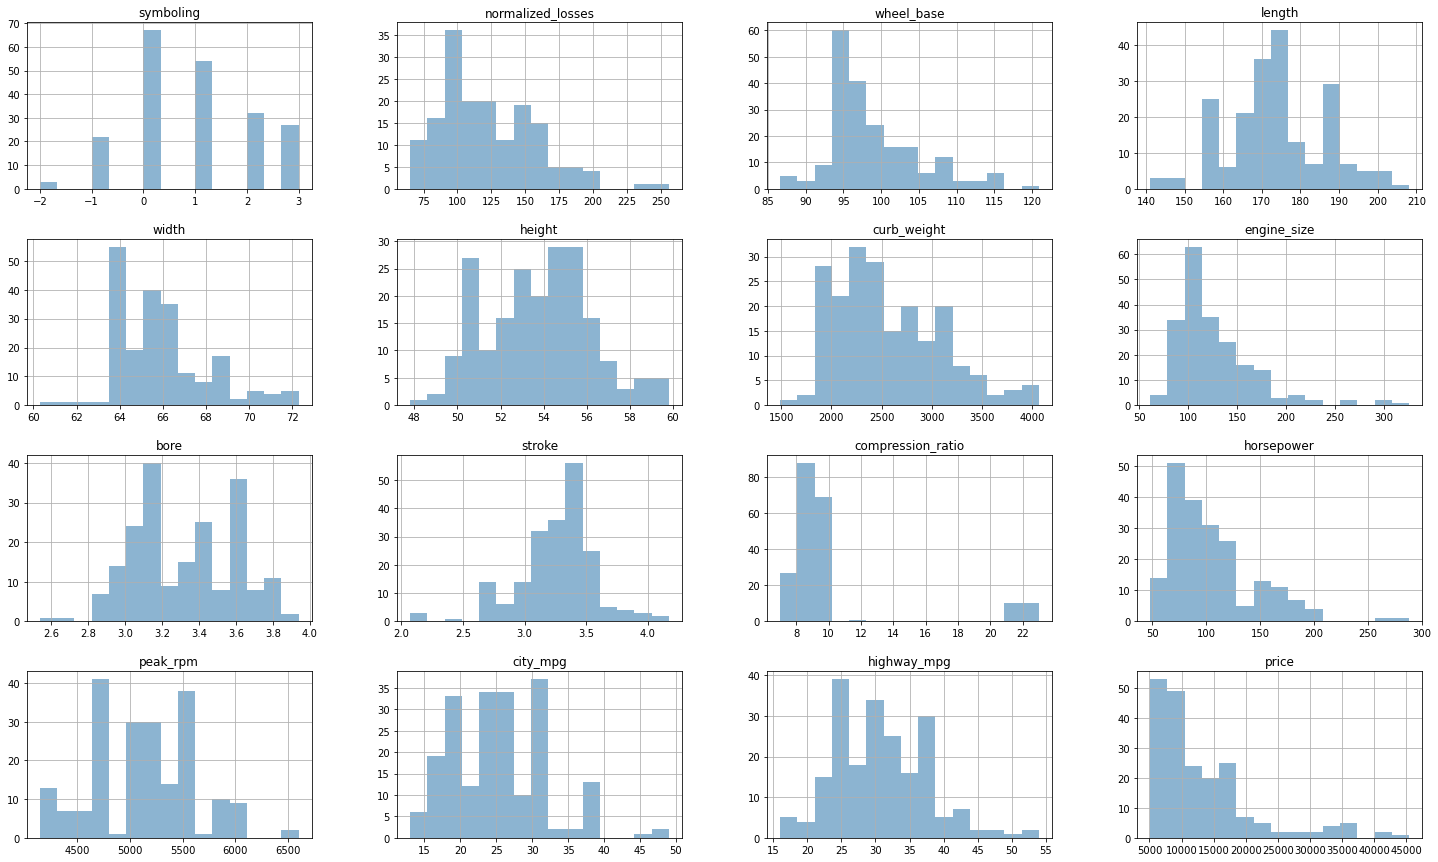

In [422]:
# plotar o histograma das variáveis numéricas
df_auto.hist(bins=15,figsize=(25,15))

Podemos verificar que na maioria das variáveis a frequencia se encontra bem distribuida.
Porém, nas variáveis **engine_size**, **compression_ratio**, **horsepower** e **price**, as maiores frequencias estão nas faixas iniciais da distribuição e também possuem alguns valores das faixas finais que se distanciam de uma distribuição normal.


**Resumo estatístico**

Através do método dataframe.describe() é possível verificar o resumo estatístico das variáveis numéricas. O resumo traz as principais informações estatísticas (count, mean, std, min, max, 25%, 50% e 75%).

In [423]:
# Resumo estatístico incluindo as variáveis numéricas
df_auto.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


No resumo podemos confirmar que :
* **engine_size** tem valor máximo de 326, possui 75% dos registros com valor abaixo de 141 e valor médio de 126.
* **compression_ratio** tem valor máximo de 23, possui 75% dos registros com valor abaixo de 9.5 e valor médio de 10.
* **horsepower** tem valor máximo de 288, mas possui 75% dos registros abaixo de 116 e o valor médio é 104.
* **price** que é nossa variável **alvo**, tem valor máximo de 45.400, mas possui 75% dos registros abaixo de 16.500 e valor médio de 13.207.

In [424]:
df_auto[['engine_size', 'compression_ratio', 'horsepower','price']].describe()

,engine_size,compression_ratio,horsepower,price
count,205.000000,205.000000,203.000000,201.000000
mean,126.907317,10.142537,104.256158,13207.129353
std,41.642693,3.972040,39.714369,7947.066342
min,61.000000,7.000000,48.000000,5118.000000
25%,97.000000,8.600000,70.000000,7775.000000
50%,120.000000,9.000000,95.000000,10295.000000
75%,141.000000,9.400000,116.000000,16500.000000
max,326.000000,23.000000,288.000000,45400.000000


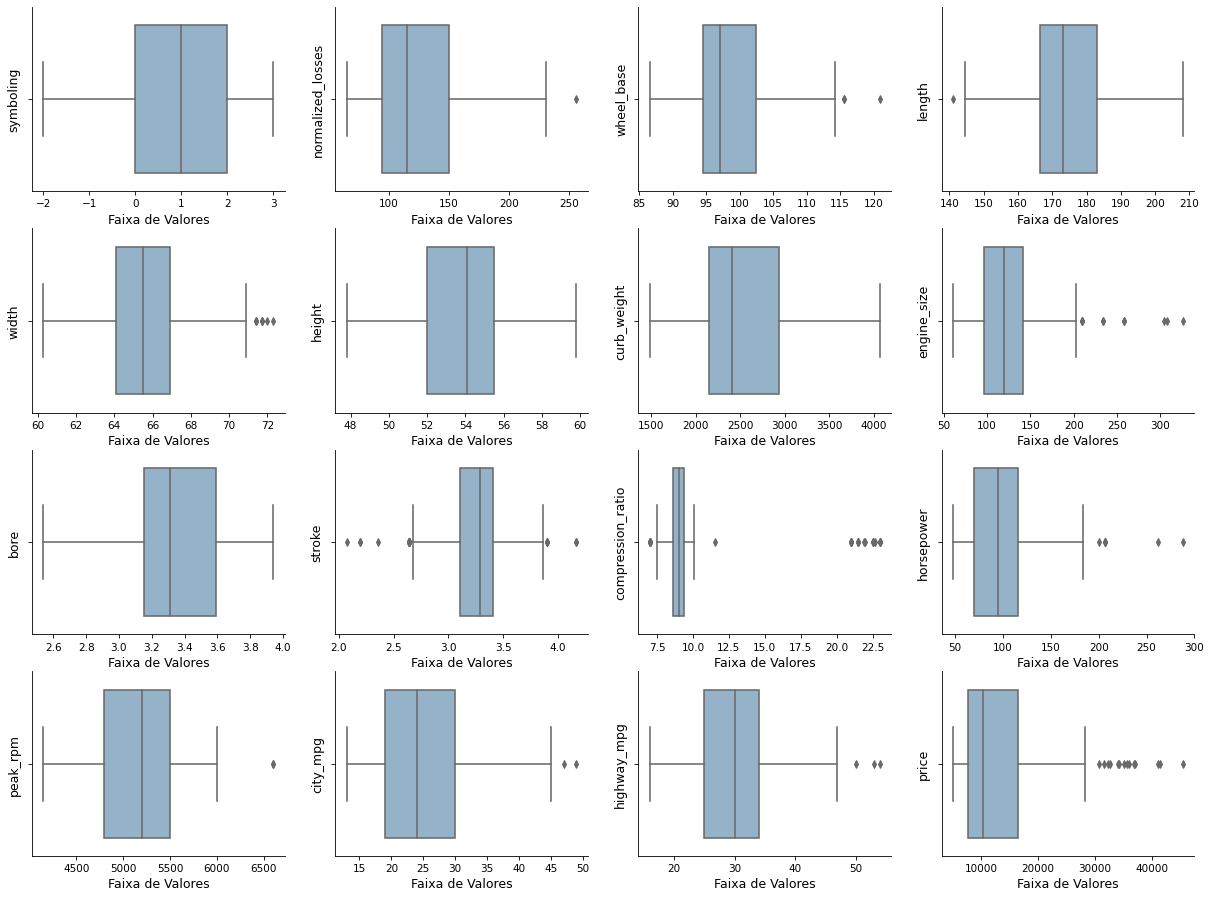

In [425]:
cols = df_auto.select_dtypes(exclude='object').columns
fig, axs = plt.subplots(4, 4, figsize=(20,15), dpi=75)
for ax, i in zip(axs.flat, range(16)):
  sns.set_palette("PuBuGn_d")
  sns.boxplot(x = df_auto[cols[i]], orient="h",  ax = ax)
  ax.set_xlabel('Faixa de Valores', fontsize=12)
  ax.set_ylabel(f"{cols[i]}", fontsize=12)
  ax.spines[['top','right']].set_visible(False)

Podemos verificar através dos gráficos boxplot, que existem indicios de **outliers**, como podemos ver em **engine_size**, **compression_ratio**, **horsepower** e **price**.

>Em estatística, outlier, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série, ou que é inconsistente.

>A existência de outliers implica, tipicamente, em prejuízos à interpretação dos resultados dos testes estatísticos aplicados às amostras.

Para realizarmos o tratamento dos outliers, utilizamos os dados obtidos através do calculo do IQR Score (Interquartile Range):

<center><img alt="IQR" width="50%" src="https://raw.githubusercontent.com/AAndreo/data-science/main/img/IQR.png"></center>

* IQR = Q3 - Q1
* Q3 = valor em 75%
* Q1 = valor em 25%

Limites inferior e superior: 

Os limites inferior e superior se estendem para fora do boxplot para conseguir representar a variabilidade da distribuição dos dados. Valores que estejam além desses limites podem ser considerados mo sendo outliers.

* Limite inferior : Q1 - 1.5 * IQR
* Limite Superior : Q3 + 1.5 * IQR

Caso não existam valores negativos na variavel analisada, não é necessário o calculo do limite inferior desta.

In [426]:
df_iqr = df_auto[['price','horsepower','engine_size','compression_ratio']]
iqrs = []
for col in (df_iqr.columns):
    q1 = df_iqr[col].quantile(.25)
    q3 = df_iqr[col].quantile(.75)
    iqr = q3 - q1
    # calcular  o limite superior de price
    limite_superior = q3 + 1.5 * iqr
    iqrs.append({'Variavel' : col,  
                 'Q1' : q1,
                 'Q3' : q3,
                 'IQR' : iqr,
                 'Limite Superior' : limite_superior})
    
iqrs = pd.DataFrame(iqrs)
iqrs

,Variavel,Q1,Q3,IQR,Limite Superior
0,price,7775.0,16500.0,8725.0,29587.5
1,horsepower,70.0,116.0,46.0,185.0
2,engine_size,97.0,141.0,44.0,207.0
3,compression_ratio,8.6,9.4,0.8,10.6


### Distribuição de valores das variáveis categóricas

In [427]:
df_auto.select_dtypes(include='object')

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


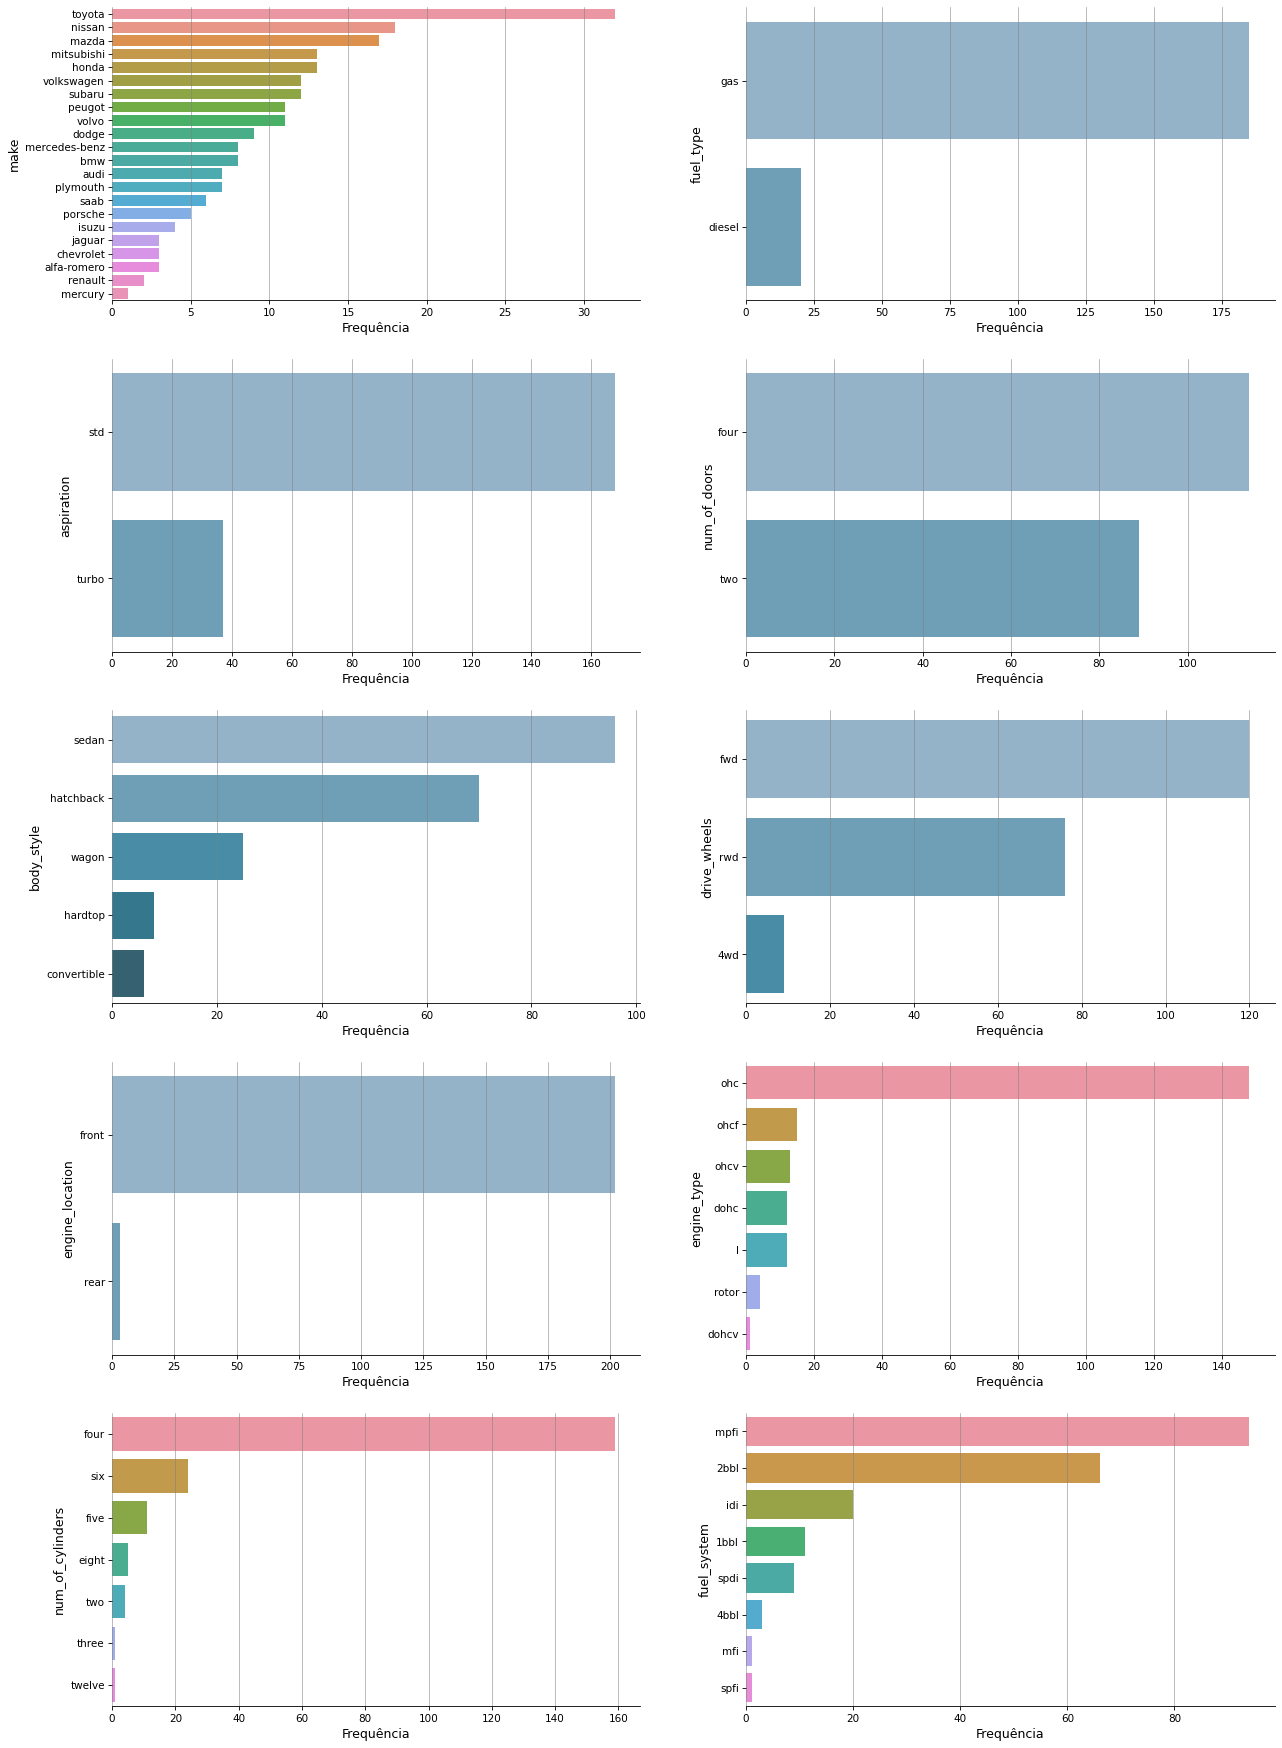

In [428]:
cols = df_auto.select_dtypes(include=['object']).columns
fig, axs = plt.subplots(5, 2, figsize=(20,30), dpi=75)
for ax, i in zip(axs.flat, range(10)):
  x = df_auto[cols[i]].value_counts().index
  y = df_auto[cols[i]].value_counts().values
  sns.barplot(x=y, y=x, ax=ax)
  ax.grid(which='major', axis='x', color='gray', linestyle='-', linewidth=.5)
  ax.set_xlabel('Frequência', fontsize=12)
  ax.set_ylabel(f"{cols[i]}", fontsize=12)
  ax.spines[['top','left', 'right']].set_visible(False)

Com os gráficos de barras, podemos visualizar que algumas variáveis possuem muitas categorias e algumas com pouca representatividade, por exemplo, a variável **make**, que possue as categorias **isuzu**, **jaguar**, **chevrolet**, **alfa-romero**, **renault** e **mercury** com menos de cinco registros.

Posteriormente na fase de pré-processamento iremos nos aprofundar nesses casos.

A contagem de valores é uma boa forma de entender quantas unidades de cada característica/variável temos.

Podemos aplicar o método `value_counts` na coluna selecionada, não esquecendo que o método só funciona em séries de pandas, não em dataframes de pandas.

In [429]:
cols = df_auto.select_dtypes(include=['object']).columns
for col in cols:
  print(f'Frequência para {col}:')
  print('*' * 35)
  print(df_auto[col].value_counts())
  print()

Frequência para make:
***********************************
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

Frequência para fuel_type:
***********************************
gas       185
diesel     20
Name: fuel_type, dtype: int64

Frequência para aspiration:
***********************************
std      168
turbo     37
Name: aspiration, dtype: int64

Frequência para num_of_doors:
***********************************
four    114
two      89
Name: num_of_doors, dtype: int64

Frequência para body_style:
***********************************
sedan          96
hatchback      70
wagon   

**Resumo estatístico**

Para visualizarmos o resumo estatístico para variáveis não numéricas, ou seja, do tipo object, usamos o método da seguinte maneira, `dataframe.describe(include = [object])`.

In [430]:
df_auto.describe(include='object')

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


A seguir, faremos algumas pesquisas, buscando informações iniciais através da plotagem de gráficos.

In [34]:
# Quantidade de carros por fabricante
df_auto['make'].value_counts().to_frame()

,make
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


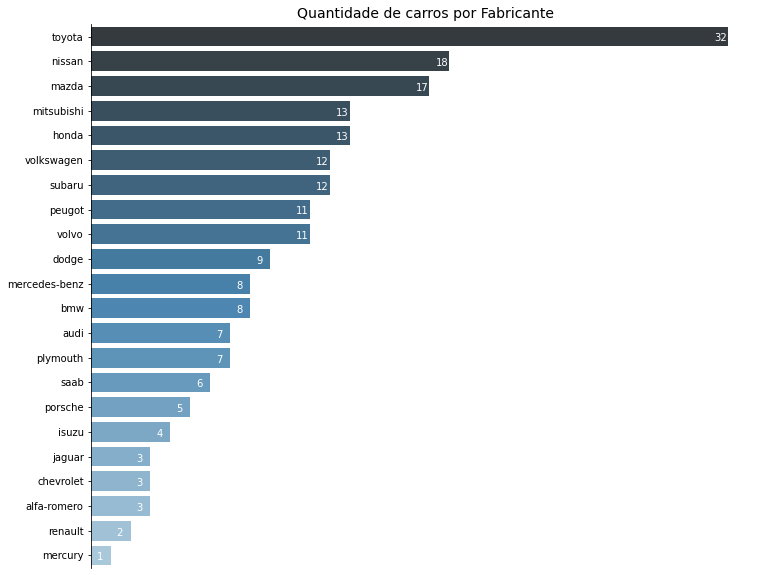

In [10]:
# Quantidade de carros por fabricante
fig, ax = plt.subplots(1,1,figsize=(12,10))
dados = df_auto['make'].value_counts()
pal = sns.color_palette("Blues_d", len(dados))

ax = sns.barplot(x=dados, y=dados.index, palette=np.array(pal[::-1]))

ax.spines[['right','top','bottom']].set_visible(False)
ax.set_ylabel('')
ax.set_xticks(ticks=[])
ax.set_xlabel('')
ax.set_title('Quantidade de carros por Fabricante', fontsize=14)

for index, value in enumerate(dados): 
    label = int(value)

    ax.annotate(label, xy=(value-0.70, index+0.2), color='white')

In [31]:
# Os 5 fabricantes com as maiores médias de preços
df_auto[['make','price']].groupby(by='make').mean().sort_values(by='price',ascending=False).head()

,price
make,
jaguar,34600.000000
mercedes-benz,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818


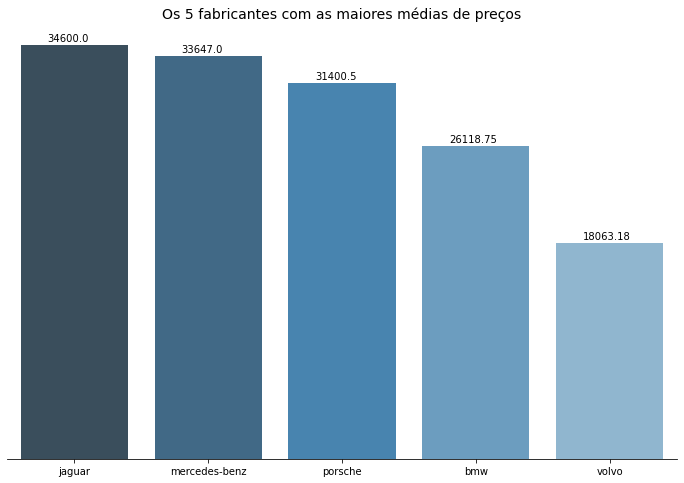

In [11]:
# As 5 marcas com as maiores médias de preços
fig, ax = plt.subplots(figsize=(12,8))
dados = df_auto[['make','price']].groupby(by='make').mean().sort_values(by='price',ascending=False).head()
pal = sns.color_palette("Blues_d", len(dados))
sns.barplot(x=dados.index, y=dados.price, palette=np.array(pal[::-1]), ax=ax)
ax.set_title("Os 5 fabricantes com as maiores médias de preços", fontsize=14)
ax.spines[['top','right','left']].set_visible(False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks(ticks=[])
for index, value in enumerate(dados.price): 
    label = round(value,2)
    ax.annotate(label, xy=(index-0.20,int(value)+300), color='black')


In [35]:
# Quantidade de automóveis por tipo de combustível
df_auto[['make','fuel_type']].groupby(by=['make','fuel_type']).value_counts().reset_index(name='qtd').sort_values(by=['make','qtd'], ascending=[True,False])

,make,fuel_type,qtd
0,alfa-romero,gas,3
1,audi,gas,7
2,bmw,gas,8
3,chevrolet,gas,3
4,dodge,gas,9
5,honda,gas,13
6,isuzu,gas,4
7,jaguar,gas,3
9,mazda,gas,15
8,mazda,diesel,2


Text(0.5, 0, 'Quantidade de automóveis por tipo de combustível')

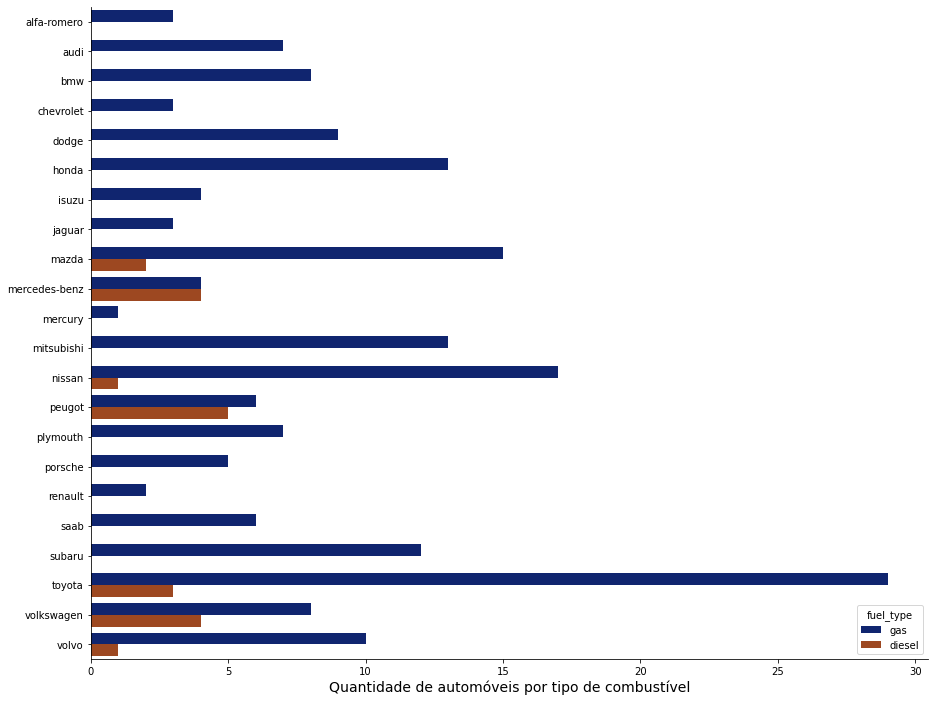

In [15]:
dados = df_auto[['make','fuel_type']].groupby(by=['make','fuel_type']).value_counts().reset_index(name='qtd').sort_values(by=['make','qtd'], ascending=[True,False])
fig , ax = plt.subplots(figsize=(15,12))
# Draw a nested barplot
ax = sns.barplot(data=dados,x='qtd', y='make', hue="fuel_type", palette='dark')
ax.spines[['top','right']].set_visible(False)
ax.set_ylabel("")
ax.set_xlabel('Quantidade de automóveis por tipo de combustível', fontsize=14)

In [86]:
# Média da autonomia na estrada e cidade por fabricante
df_auto[['make','city_mpg','highway_mpg']].groupby(by='make').mean().sort_values(by='highway_mpg', ascending=False)

,city_mpg,highway_mpg
make,,
chevrolet,41.000000,46.333333
isuzu,31.000000,36.000000
honda,30.384615,35.461538
volkswagen,28.583333,34.916667
plymouth,28.142857,34.142857
dodge,28.000000,34.111111
nissan,27.000000,32.944444
toyota,27.500000,32.906250
mazda,25.705882,31.941176


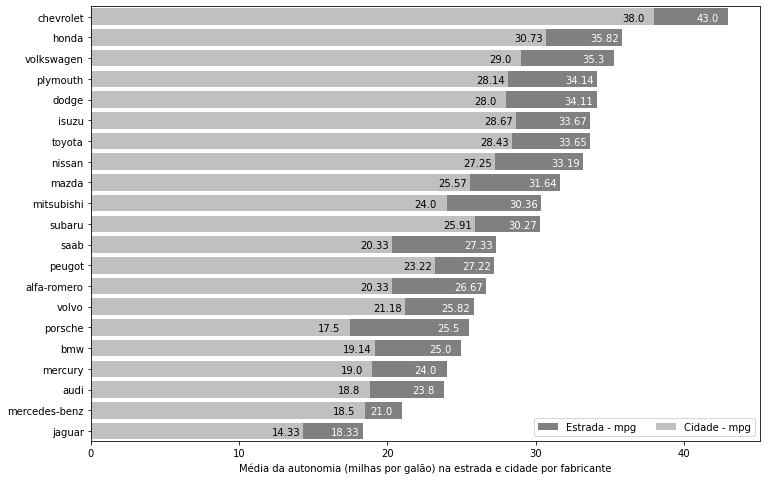

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
dados = df_auto[['make','city_mpg','highway_mpg']].groupby(by='make').mean().sort_values(by='highway_mpg', ascending=False)
pal = sns.color_palette("Pastel2", len(dados))
pal1 = sns.color_palette("Pastel1", len(dados))
ax = sns.barplot(x=dados.highway_mpg, y=dados.index, data=dados, label='Estrada - mpg', color='grey')
ax = sns.barplot(x=dados.city_mpg, y=dados.index, data=dados, label='Cidade - mpg', color='silver')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_ylabel("")
ax.set_xlabel('Média da autonomia (milhas por galão) na estrada e cidade por fabricante')

# Valores para highway-mpg
for x, y in enumerate(dados.highway_mpg):
    label = round(y,2)
    ax.annotate(label, xy=(y-2.15,x+0.2), color='white')

# Valores para city-mpg
for x, y in enumerate(dados.city_mpg):
    label = round(y,2)
    ax.annotate(label, xy=(y-2.15,x+0.2), color='black')

In [234]:
# Salvando o dataframe após analise exploratoria
df_auto.to_csv('df_auto_explo.csv', index=False)

### Divisão do conjunto de dados

#### Separando o conjunto de Teste

In [484]:
# Carregando o dataframe df_auto_explo salvo anteriormente
df_auto = pd.read_csv('df_auto_explo.csv')

In [486]:
# criando o conjunto de teste
df_test = df_auto.sample(frac=0.30, random_state=0)

# verificando o conjunto
print(df_test.shape)
df_test.head()

(62, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
181,-1,NaN,toyota,gas,std,four,wagon,rwd,front,104.5,...,161,mpfi,3.27,3.35,9.2,156.0,5200.0,19,24,15750.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
188,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100.0,5500.0,26,32,9995.0


In [487]:
# drop das linhas de teste
df_auto = df_auto.drop(df_test.index)

# verificando o shape do df
df_auto.shape

(143, 26)

In [488]:
# resetando o index dos conjuntos
df_auto.reset_index()
df_test.reset_index()

,index,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
1,181,-1,NaN,toyota,gas,std,four,wagon,rwd,front,...,161,mpfi,3.27,3.35,9.2,156.0,5200.0,19,24,15750.0
2,5,2,NaN,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
3,18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
4,188,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,100.0,5500.0,26,32,9995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,198,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420.0
58,143,0,102.0,subaru,gas,std,four,sedan,fwd,front,...,108,mpfi,3.62,2.64,9.0,94.0,5200.0,26,32,9960.0
59,24,1,148.0,dodge,gas,std,four,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229.0
60,30,2,137.0,honda,gas,std,two,hatchback,fwd,front,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0


In [491]:
# Salvando o dataframe após divisao do conjunto de dados
df_test.to_csv('df_test.csv', index=False)

In [492]:
# Salvando o dataframe após divisao do conjunto de dados
df_auto.to_csv('df_auto_divisao.csv', index=False)

### *Pré-Processamento de Dados*.
Sendo uma etapa necessária na análise, é o processo de converter ou mapear dados de uma forma “bruta” para outro
formato para torná-lo pronto para análise posterior.

Objetivos:
* Tratamento dos valores ausentes
* Tratamento de outliers
* Formatação de dados
* Categorização de dados
* Transformar valores categóricos em variáveis numéricas - Encoding

#### Tratando dados ausentes

**Como tratar os dados ausentes?**


1.   Excluindo dados
  *   Excluir toda linha
  *   Excluir toda coluna
2.   Substituindo dados
  * Substituição pela média
  * Substituição pela frequencia
  * Substituição baseado em outras funções

In [609]:
# Carregando o dataframe df_auto_divisao salvo anteriormente
df_auto = pd.read_csv('df_auto_divisao.csv')

In [610]:
# Carregando o dataframe df_auto_divisao salvo anteriormente
df_test = pd.read_csv('df_test.csv')

In [611]:
# Mostra quais colunas possuem valores ausentes
ausentes = {k : v for k, v in df_auto.isna().sum().to_dict().items() if v > 0}
ausentes = pd.DataFrame(ausentes.items(), columns=['Coluna','Valores ausentes'])
ausentes

,Coluna,Valores ausentes
0,normalized_losses,23
1,num_of_doors,1
2,bore,3
3,stroke,3
4,price,1


Colunas inteiras devem ser descartadas somente se a maioria das entradas na coluna estiver vazia. Em nosso conjunto de dados, nenhuma das colunas está vazia o suficiente para ser descartada completamente.

Aplicaremos cada método a muitas colunas diferentes:

**Substituição pela média:**
* normalized_losses
* stroke
* bore 

**Substituição pela frequencia:**
* num_of_doors : Serão substituidos com o valor "four", pois representa mais de 56% do total dos registros.

**Excluir toda a linha:**
* price: Excluir toda a linha, pelo fato do preço ser o que queremos prever. Qualquer entrada de dados sem dados de preço não pode ser usada para previsão.

In [612]:
# Conjunto de dados Treinamento
# Calculando as medias
avg_norm_loss = df_auto['normalized_losses'].mean()
avg_stroke = df_auto['stroke'].mean()
avg_bore = df_auto['bore'].mean()

In [613]:
# Substituindo os valores ausentes (NaN) com a média 
df_auto['normalized_losses'].replace(np.NaN, avg_norm_loss, inplace = True)
df_auto['stroke'].replace(np.NaN, avg_stroke, inplace= True)
df_auto['bore'].replace(np.NaN, avg_bore, inplace = True)

In [615]:
# Substituindo os valores ausentes (NaN) com o valor mais comum ("four"), encontrado para coluna "num-of-doors".
df_auto['num_of_doors'].replace(np.NaN, "four", inplace = True)

In [616]:
# Vamos excluir todas as linhas que possuem valores ausentes (NaN) para a coluna "price".
df_auto.dropna(subset=['price'], axis = 0, inplace = True)

# Vamos reiniciar o indice, pois excluimos algumas linhas do dataframe.
df_auto.reset_index(drop = True, inplace = True)

In [617]:
dados_ausentes = {col: df_auto[col].isna().sum().astype('str') + ' => ' + ((df_auto[col].isna().sum() / df_auto[col].shape[0]) * 100).round(2).astype('str') +
                  '%' for col in df_auto.columns.values.tolist()}
dados_ausentes = pd.DataFrame(dados_ausentes.items(), columns=['Coluna', 'Valores ausentes => Percentual Total'])
dados_ausentes

,Coluna,Valores ausentes => Percentual Total
0,symboling,0 => 0.0%
1,normalized_losses,0 => 0.0%
2,make,0 => 0.0%
3,fuel_type,0 => 0.0%
4,aspiration,0 => 0.0%
5,num_of_doors,0 => 0.0%
6,body_style,0 => 0.0%
7,drive_wheels,0 => 0.0%
8,engine_location,0 => 0.0%
9,wheel_base,0 => 0.0%


In [618]:
print(f'Nosso dataframe possui agora {df_auto.shape[0]} linhas e {df_auto.shape[1]} colunas.')

Nosso dataframe possui agora 142 linhas e 26 colunas.


**Conjunto de Dados de Teste**

In [619]:
df_test.shape

(62, 26)

In [620]:
ausentes_test = {k : v for k, v in df_test.isna().sum().to_dict().items() if v > 0}
ausentes_test 

{'normalized_losses': 18,
 'num_of_doors': 1,
 'bore': 1,
 'stroke': 1,
 'horsepower': 2,
 'peak_rpm': 2,
 'price': 3}

In [621]:
# Conjunto de dados Teste
# Tratamento dos dados ausentes
df_test['normalized_losses'].replace(np.NaN, df_test['normalized_losses'].mean(), inplace = True)
df_test['horsepower'].replace(np.NaN, df_test['horsepower'].mean(), inplace = True)
df_test['peak_rpm'].replace(np.NaN, df_test['peak_rpm'].mean(), inplace = True)

df_test['stroke'].replace(np.NaN, df_test['stroke'].mean(), inplace= True)
df_test['bore'].replace(np.NaN, df_test['bore'].mean(), inplace = True)

In [622]:
# Substituindo os valores ausentes (NaN) com o valor mais comum ("four"), encontrado para coluna "num-of-doors".
df_test['num_of_doors'].replace(np.NaN, "four", inplace = True)

In [623]:
# # Vamos excluir todas as linhas que possuem valores ausentes (NaN) para a coluna "price".
df_test.dropna(subset=['price'], axis = 0, inplace = True)

# Vamos reiniciar o indice, pois excluimos algumas linhas do dataframe.
df_test.reset_index(drop = True, inplace = True)

In [624]:
ausentes_test = {k : v for k, v in df_test.isna().sum().to_dict().items() if v > 0}
ausentes_test

{}

#### Tratamento de Outliers

Na fase exploratória de dados, vimos que as variáveis **price**, **horsepower**, **engine_size** e **compression_ratio**, apresentaram valores com caracteristicas de **outliers**.

Após a realização do tratamento de valores ausentes, vamos realizar uma nova verificação sobre estas variáveis.

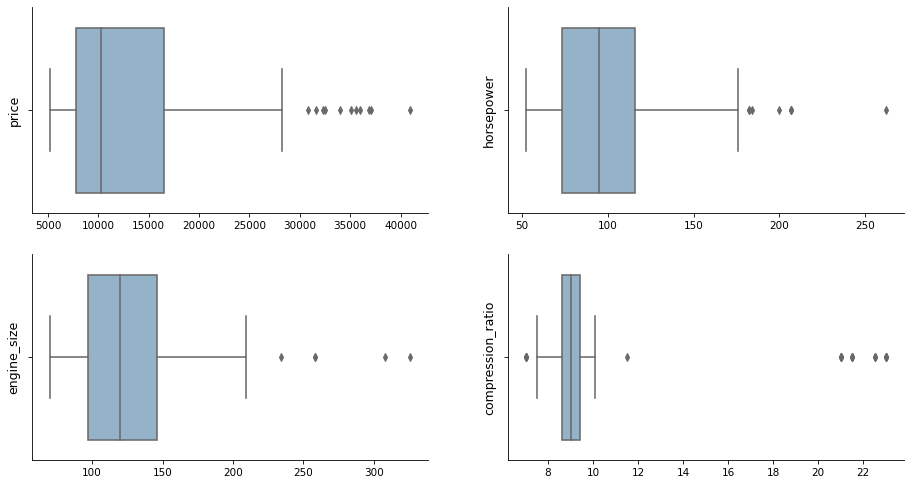

In [625]:
df_iqr = df_auto[['price','horsepower','engine_size','compression_ratio']]
fig, axs = plt.subplots(2, 2, figsize=(15,8), dpi=75)
for ax, col in zip(axs.flat, df_iqr):
    sns.boxplot(x=df_iqr[col].values, ax=ax, orient='h')
    ax.set_ylabel(f"{col}", fontsize=12)
    ax.spines[['top','right']].set_visible(False)

In [626]:
df_iqr = df_auto[['price','horsepower','engine_size','compression_ratio']]
iqrs = []
for col in (df_iqr.columns):
    q1 = df_iqr[col].quantile(.25)
    q3 = df_iqr[col].quantile(.75)
    iqr = q3 - q1
    # calcular  o limite superior de price
    limite_superior = q3 + 1.5 * iqr
    iqrs.append({'Variavel' : col,  
                 'Q1' : q1,
                 'Q3' : q3,
                 'IQR' : iqr,
                 'Limite Superior' : limite_superior,
                 'Mediana' : df_iqr[col].median()})
    
iqrs = pd.DataFrame(iqrs)
iqrs

,Variavel,Q1,Q3,IQR,Limite Superior,Mediana
0,price,7778.25,16500.00,8721.75,29582.625,10221.5
1,horsepower,73.00,116.00,43.00,180.500,95.0
2,engine_size,97.25,145.75,48.50,218.500,119.5
3,compression_ratio,8.60,9.40,0.80,10.600,9.0


In [627]:
for col , limite in zip(iqrs['Variavel'], iqrs['Limite Superior']):
    print(f'Variável: {col}')
    print(f'São {(len(df_auto[df_auto[col] > limite]))} entradas com valores acima de {limite:.2f}')
    print(f"Este valor representa {((len(df_auto[df_auto[col] > limite]) / df_auto.shape[0])*100):.2f}% do total de registros".format((len(df_auto[df_auto[col] > limite]) / df_auto.shape[0])*100))
    print('#' * 50)

Variável: price
São 11 entradas com valores acima de 29582.62
Este valor representa 7.75% do total de registros
##################################################
Variável: horsepower
São 8 entradas com valores acima de 180.50
Este valor representa 5.63% do total de registros
##################################################
Variável: engine_size
São 5 entradas com valores acima de 218.50
Este valor representa 3.52% do total de registros
##################################################
Variável: compression_ratio
São 18 entradas com valores acima de 10.60
Este valor representa 12.68% do total de registros
##################################################


Identificado os outliers nas variáveis, a próxima etapa será limpar o DataFrame.

In [628]:
# remover os *outliers* do DataFrame utilizando o valor da mediana das respectivas colunas
for col , limite, mediana in zip(iqrs['Variavel'], iqrs['Limite Superior'], iqrs['Mediana']):
    df_auto.loc[df_auto[col] > limite, [col]] = mediana

**Conjunto de Dados Teste**

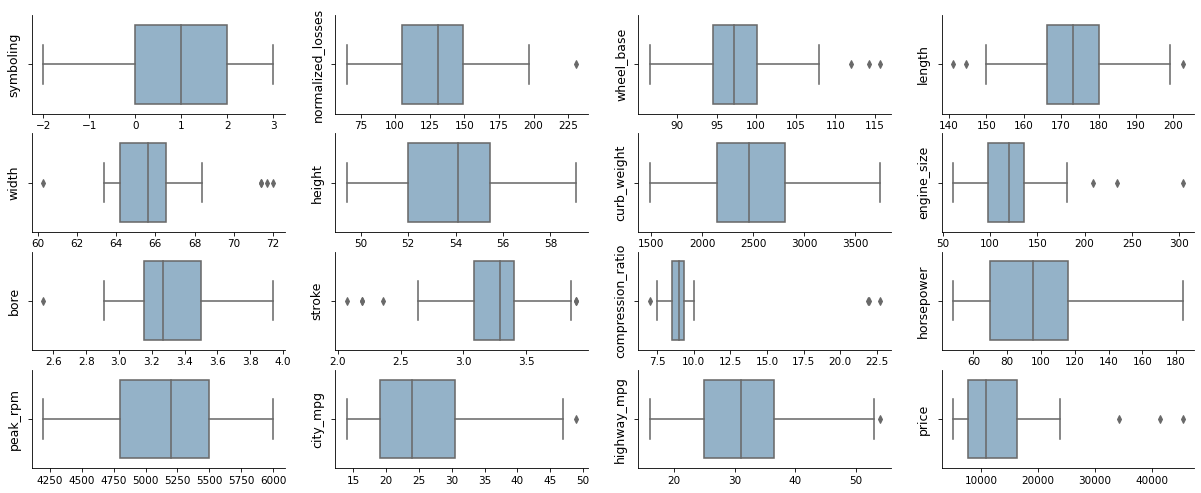

In [630]:
df_iqr_test = df_test.select_dtypes(exclude='object')
fig, axs = plt.subplots(4, 4, figsize=(20,8), dpi=75)
for ax, col in zip(axs.flat, df_iqr_test):
    sns.boxplot(x=df_iqr_test[col].values, ax=ax, orient='h')
    ax.set_ylabel(f"{col}", fontsize=12)
    ax.spines[['top','right']].set_visible(False)

In [631]:
df_test[['wheel_base','compression_ratio','highway_mpg','city_mpg','height','width','length','price', 'engine_size']].describe()

,wheel_base,compression_ratio,highway_mpg,city_mpg,height,width,length,price,engine_size
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,98.320339,9.518644,31.135593,25.406780,53.610169,65.938983,173.532203,13061.661017,124.627119
std,5.537670,3.022187,7.824492,7.439685,2.250570,2.205559,12.943943,8014.284475,39.791222
min,86.600000,7.000000,16.000000,14.000000,49.400000,60.300000,141.100000,5118.000000,61.000000
25%,94.500000,8.500000,25.000000,19.000000,52.000000,64.200000,166.300000,7752.000000,98.000000
50%,97.200000,9.000000,31.000000,24.000000,54.100000,65.600000,173.200000,10795.000000,120.000000
75%,100.100000,9.350000,36.500000,30.500000,55.450000,66.550000,180.000000,16250.500000,136.000000
max,115.600000,22.700000,54.000000,49.000000,59.100000,72.000000,202.600000,45400.000000,304.000000


In [632]:
df_iqr_test = df_test[['price','engine_size','compression_ratio']]
iqrs_test = []
for col in (df_iqr_test.columns):
    q1 = df_iqr_test[col].quantile(.25)
    q3 = df_iqr_test[col].quantile(.75)
    iqr = q3 - q1
    # calcular  o limite superior de price
    limite_superior = q3 + 1.5 * iqr
    iqrs_test.append({'Variavel' : col,  
                 'Q1' : q1,
                 'Q3' : q3,
                 'IQR' : iqr,
                 'Limite Superior' : limite_superior,
                 'Mediana' : df_iqr_test[col].median()})
    
iqrs_test = pd.DataFrame(iqrs_test)
iqrs_test

,Variavel,Q1,Q3,IQR,Limite Superior,Mediana
0,price,7752.0,16250.50,8498.50,28998.250,10795.0
1,engine_size,98.0,136.00,38.00,193.000,120.0
2,compression_ratio,8.5,9.35,0.85,10.625,9.0


In [633]:
# remover os *outliers* do DataFrame utlizando o valor da mediana.
for col , limite, mediana in zip(iqrs_test['Variavel'], iqrs_test['Limite Superior'], iqrs_test['Mediana']):
    df_test.loc[df_test[col] > limite, [col]] = mediana

In [636]:
# Salvando o dataframe após limpeza do conjunto de dados
df_auto.to_csv('df_auto_clean.csv', index=False)

In [786]:
# Carregando o dataframe df_auto_clean salvo anteriormente
df_auto = pd.read_csv('df_auto_clean.csv')

In [638]:
# Salvando o dataframe após limpeza do conjunto de dados
df_test.to_csv('df_test_clean.csv', index=False)

In [787]:
# Carregando o dataframe df_auto_clean salvo anteriormente
df_test = pd.read_csv('df_test_clean.csv')

#### Realizando o processo de Encoding nas variaveis categoricas.

In [788]:
df_auto.shape

(142, 26)

In [789]:
df_test.shape

(59, 26)

In [790]:
# df_auto.loc[df_auto.engine_type.isin(['ohcf','ohcv','dohc','l','rotor']),'engine_type'] = 'other'
df_auto.loc[df_auto.num_of_cylinders.isin(['two','eight','twelve']), 'num_of_cylinders'] = 'other'
df_auto.loc[df_auto.fuel_system.isin(['1bbl','spdi','4bbl','mfi','spfi']), 'fuel_system'] = 'other'

In [791]:
# df_test.loc[df_test.engine_type.isin(['ohcf','ohcv','dohc','l','rotor']),'engine_type'] = 'other'
df_test.loc[df_test.num_of_cylinders.isin(['two','eight','three']), 'num_of_cylinders'] = 'other'
df_test.loc[df_test.fuel_system.isin(['1bbl','spdi','4bbl']), 'fuel_system'] = 'other'

In [793]:
# criando os Encoders
te = ce.TargetEncoder()
he = ce.HashingEncoder()
oe = ce.OneHotEncoder()
le = ce.OrdinalEncoder()

In [794]:
# Variavel make utilizando TargetEncoder
df_auto['make_encoded'] = te.fit_transform(df_auto['make'],df_auto['price'])

In [795]:
# Realizando o processo OneHotEncode
cols_to_onehot_encode  = ['aspiration','fuel_type','num_of_doors','body_style','drive_wheels','engine_type','num_of_cylinders','fuel_system']

In [796]:
onehot_encoded_data = oe.fit_transform(df_auto[cols_to_onehot_encode])

In [809]:
onehot_encoded_data.columns = [f"encoded_{col1}" for col1 in onehot_encoded_data.columns]

In [815]:
# Concatena as novas features criadas pelo processo de encoding
df_auto = pd.concat([df_auto, onehot_encoded_data], axis=1)

In [828]:
# Colunas para serem deletadas após realização do processo de encoding
cols_to_drop = ['symboling','normalized_losses','make','aspiration','fuel_type','num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system']

In [829]:
df_auto.drop(cols_to_drop, axis=1, inplace=True)

In [835]:
# Salvando o dataframe após limpeza do conjunto de dados
df_auto.to_csv('df_auto_encoded.csv', index=False)

**Conjunto de Dados Teste**

In [820]:
# Variavel make utilizando TargetEncoder
df_test['make_encoded'] = te.transform(df_test['make'],df_test['price'])

In [821]:
onehot_encoded_data_test = oe.transform(df_test[cols_to_onehot_encode])

In [822]:
onehot_encoded_data_test.columns = [f"encoded_{col1}" for col1 in onehot_encoded_data_test.columns]

In [824]:
df_test = pd.concat([df_test, onehot_encoded_data_test], axis=1)

In [833]:
df_test.shape

(59, 43)

In [834]:
df_auto.shape

(142, 43)

In [832]:
# Features excluidas
df_test.drop(cols_to_drop, axis=1, inplace=True)

In [836]:
# Salvando o dataframe após limpeza do conjunto de dados
df_test.to_csv('df_test_encoded.csv', index=False)

#### Tratamento de dados categóricos - Encoding 

In [ ]:
cols = df_test.select_dtypes(include=['object']).columns
fig, axs = plt.subplots(5, 2, figsize=(20,30), dpi=75)
for ax, i in zip(axs.flat, range(10)):
  x = df_test[cols[i]].value_counts().index
  y = df_test[cols[i]].value_counts().values
  sns.barplot(x=y, y=x, ax=ax)
  ax.grid(which='major', axis='x', color='gray', linestyle='-', linewidth=.5)
  ax.set_xlabel('Frequência', fontsize=12)
  ax.set_ylabel(f"{cols[i]}", fontsize=12)
  ax.spines[['top','left']].set_visible(False)

In [391]:
df_test.loc[df_test.make.isin(['volkswagen','audi','bmw']), 'make'] = 'make_germany'
df_test.loc[df_test.make.isin(['chevrolet', 'peugot']), 'make'] = 'other'
df_test.loc[df_test.engine_type.isin(['ohcf','ohcv','dohc','l','rotor']),'engine_type'] = 'other'
df_test.loc[df_test.num_of_cylinders.isin(['two','six','five','three']), 'num_of_cylinders'] = 'other'
df_test.loc[df_test.fuel_system.isin(['1bbl','spdi','4bbl']), 'fuel_system'] = 'other'

### *Feature Selection*

**Correlação entre variáveis**


Uma maneira de medir a força da correlação entre variáveis ​​numéricas contínuas é usando um método chamado Correlação de Pearson.

O método de correlação de Pearson fornecerá dois valores, o `coeficiente de correlação` e o `valor p`.

**Correlação de Pearson**

A Correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y e é obtida através do método `dataframe.corr(numeric_only=True)`

O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:

* 1: Correlação linear positiva perfeita.
* 0: Sem correlação linear, as duas variáveis ​​provavelmente não afetam uma à outra.
* -1: Correlação linear negativa perfeita.

**P-value**

***Qual é esse P-value?***

O P-value é o valor da probabilidade de que a correlação entre essas duas variáveis ​​seja estatisticamente significativa. Normalmente, escolhemos um nível de significância de 0,05, o que significa que temos 95% de confiança de que a correlação entre as variáveis ​​é significativa.

Por convenção, quando o

* P-value é $<$ 0,001:  dizemos que há forte evidência de que a correlação é significativa.
* P-value entre 0,001 e 0,05:  há evidência moderada de que a correlação é significativa.
* P-value entre 0,05 e 0,1: há evidências fracas de que a correlação é significativa.
* P-value é $>$ 0,1: não há evidência de que a correlação seja significativa.

In [724]:
df_auto_fs = pd.read_csv('df_auto_encoded.csv')

In [793]:
# Seleciona as variaveis com o coeficiente de pearson cujo p-value é significativo, ou seja, com valor igual ou inferior a 0.05.
def fs_pearson():

    cols_to_pearson = [col for col in df_auto_fs.columns if 'encoded' not in col]

    colunas = []
    pearson = []

    for col in df_auto_fs[cols_to_pearson]:
        pearson_coef, p_value = stats.pearsonr(df_auto_fs[col], df_auto_fs[target])
        if (p_value <= 0.05):
            colunas.append(col)  
            pearson.append({'Feature' : col,
                            'Alvo' : target,
                            'Pearson' : pearson_coef,
                            'p-value' : f'{p_value:.5f}'
            })
    pearson_corr = pd.DataFrame(pearson)

    corr = []
    for col in df_auto_fs[colunas]:
        for col1 in df_auto_fs[colunas]:
            if (col != col1):
                pearson_coef, p_value = stats.pearsonr(df_auto_fs[col], df_auto_fs[col1])
                if (np.absolute(p_value) > 0.05):    
                    # (col != target) &         
                    corr.append({'Feature' : col,
                                'Feature_1' : col1,
                            'pearson_corr' : pearson_coef,
                            'p-value' : f'{p_value:.5f}',
                            'Colinearidade' : 'X' if np.absolute(p_value) <= 0.05 else np.NaN
                            })
    colinearidade = pd.DataFrame(corr)
    cols_pearson = list(set([col for col in colinearidade['Feature']]))
    cols_pearson.append(target)
    
    return pearson_corr, colinearidade, cols_pearson

In [794]:
pearson_corr, colinearidade,  selected_cols_to_pearson = fs_pearson()

In [795]:
pearson_corr

,Feature,Alvo,Pearson,p-value
0,wheel_base,price,0.554840,0.00000
1,length,price,0.624728,0.00000
2,width,price,0.629895,0.00000
3,height,price,0.285522,0.00057
4,curb_weight,price,0.657878,0.00000
5,engine_size,price,0.617253,0.00000
6,bore,price,0.477627,0.00000
7,horsepower,price,0.619044,0.00000
8,peak_rpm,price,-0.175670,0.03652
9,city_mpg,price,-0.547473,0.00000


In [796]:
pearson = df_auto_fs[pearson_corr['Feature'].to_list()].corr()['price'].to_frame()

Text(567.41375, 0.5, 'Correlação variáveis independentes x Alvo (price)')

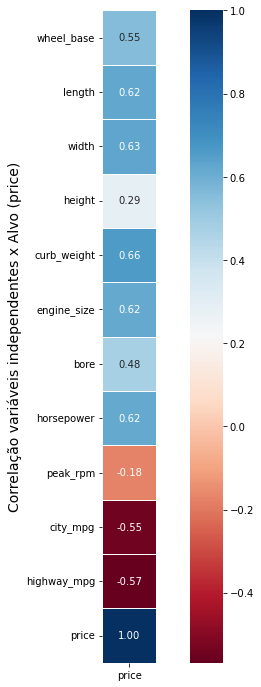

In [797]:
# Correlação entre price e as features independentes
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(pearson, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, linewidths=.5, ax=ax);
ax.set_ylabel('Correlação variáveis independentes x Alvo (price)', fontsize=14)

In [798]:
colinearidade

,Feature,Feature_1,pearson_corr,p-value,Colinearidade
0,height,horsepower,-0.008447,0.92052,NaN
1,height,city_mpg,-0.001304,0.98771,NaN
2,height,highway_mpg,-0.062862,0.45736,NaN
3,horsepower,height,-0.008447,0.92052,NaN
4,horsepower,peak_rpm,0.052850,0.53220,NaN
5,peak_rpm,horsepower,0.052850,0.53220,NaN
6,peak_rpm,city_mpg,-0.104015,0.21800,NaN
7,peak_rpm,highway_mpg,-0.036061,0.67007,NaN
8,city_mpg,height,-0.001304,0.98771,NaN
9,city_mpg,peak_rpm,-0.104015,0.21800,NaN


In [799]:
colinearidade['Feature'].unique()

array(['height', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype=object)

Text(0.5, 72.05374999999997, 'Correlação entre as variáveis independentes')

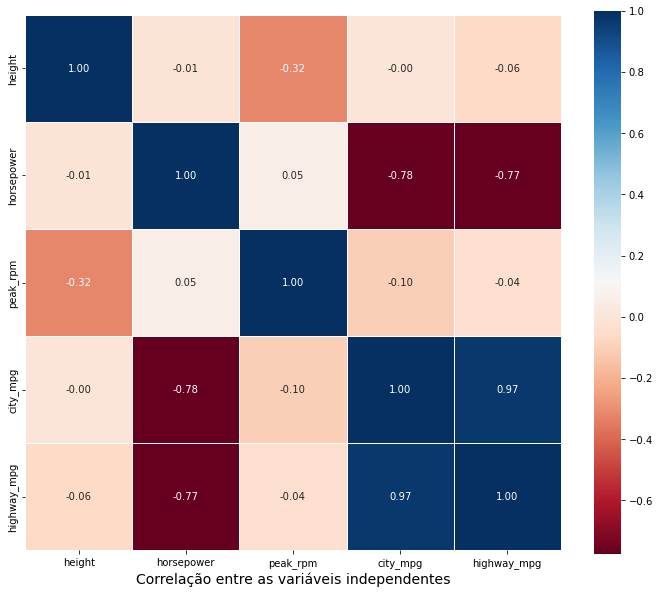

In [800]:
# Correlação entre as features independentes
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_auto_fs[colinearidade['Feature'].unique()].corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, linewidths=.5, ax=ax);
ax.set_xlabel('Correlação entre as variáveis independentes', fontsize=14)

Após analisarmos o gráfico acima, foi verificado que existe a situação de multicolinearidade, sendo necessário eliminarmos algumas features.

In [728]:
# Selecionando as features que farão parte do nosso modelo de regressão
selected_cols_to_pearson = ['horsepower','height','peak_rpm','price']

Vamos visualizar graficamente as variáveis destacadas com melhor correlação com a variável `price`, mostrando vários exemplos de diferentes relações lineares.

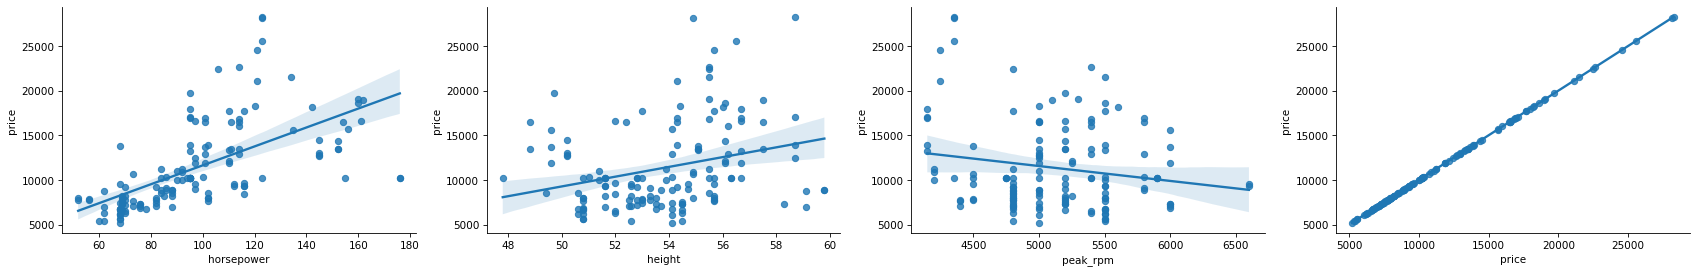

In [520]:
cols = df_auto_fs[selected_cols_to_pearson].columns[:len(df_auto_fs.columns)].tolist()
fig, axs = plt.subplots(1, 4, figsize=(28,4),dpi=75)

for ax, i in zip(axs.flat, range(len(df_auto_fs[selected_cols_to_pearson].columns))):
  sns.regplot(x=df_auto_fs[cols[i]], y=df_auto_fs[target], data=df_auto_fs, ax=ax)
  ax.spines[['right','top']].set_visible(False)

#### *ANOVA*

In [521]:
def fs_anova(threshold_f=0.0):

    cols_to_anova = [col for col in df_auto_fs.columns if 'encoded' in col]

    formulas = [f'price ~ {col}' for col in cols_to_anova]
    scores = []
    for formula in formulas:
        results = smf.ols(formula, data=df_auto_fs).fit()
        aov_table = sm.stats.anova_lm(results)
        aov_table = aov_table.iloc[0][['F','PR(>F)']]
        scores.append( {'model': formula,
            'f-value': aov_table['F'],
            'p-value': aov_table['PR(>F)']}
    )
    scores_anova = pd.DataFrame(scores)
    scores_anova['p-value'] = scores_anova['p-value'].map("{:.6f}".format)
    scores_anova = scores_anova.loc[(scores_anova['f-value'].values.astype('float') >= threshold_f) & (scores_anova['p-value'].values.astype('float') <= 0.05)].sort_values(by='f-value',ascending=False)
    cols_to_anova = [(col.split('~')[1]).strip() for col in scores_anova['model']]
    return scores_anova, cols_to_anova

In [443]:
anova, selected_cols_to_anova = fs_anova()
anova

,model,f-value,p-value
0,price ~ make_encoded,129.418890,0.000000
12,price ~ encoded_drive_wheels_1,85.960946,0.000000
13,price ~ encoded_drive_wheels_2,69.257067,0.000000
26,price ~ encoded_fuel_system_2,63.057165,0.000000
21,price ~ encoded_num_of_cylinders_1,34.936709,0.000000
2,price ~ encoded_aspiration_2,34.184503,0.000000
1,price ~ encoded_aspiration_1,34.184503,0.000000
25,price ~ encoded_fuel_system_1,31.761463,0.000000
23,price ~ encoded_num_of_cylinders_3,26.485039,0.000001
3,price ~ encoded_fuel_type_1,13.471443,0.000344


#### Modelo de Machine Learning

Nesta etapa, será criado um modelo que passou pelo processo de Feature Selection e outro modelo contendo os dados normais.

In [682]:
# Dados sem a Feature Selection
df_auto_encoded = pd.read_csv('df_auto_encoded.csv')

In [683]:
df_auto_encoded.shape

(142, 43)

In [684]:
df_auto_fs = df_auto_encoded[selected_cols_to_pearson + selected_cols_to_anova]

In [685]:
df_auto_fs.shape

(142, 22)

#### Modelo Baseline
Um modelo Baseline é essencialmente um modelo simples que atua como referência em um projeto de aprendizado de máquina. Sua principal função é contextualizar os resultados dos modelos treinados. Os modelos Baseline geralmente carecem de complexidade e podem ter pouco poder preditivo.

O desempenho desse modelo servirá como ponto de partida de comparação da avaliação da eficácia dos outros modelos mais complexos.

#### Treinamento dos Algoritmos de Machine Learning

In [636]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [686]:
# separar as variáveis independentes da variável alvo
# Data Frame sem o processo de Feature Selection
X = df_auto_encoded.drop('price', axis=1)
y = df_auto_encoded['price']

In [687]:
kfold = KFold(n_splits=10, shuffle=True, random_state=32)

In [688]:
steps = [("normalizacao", StandardScaler()), ("model", LinearRegression(n_jobs=3))]

In [689]:
pipeline_encoded = Pipeline(steps)

In [642]:
parametros = {'model__n_jobs': [3, 5, 7], 'model__fit_intercept' : [True, False]}
grid = GridSearchCV(pipeline_encoded, param_grid=parametros)
grid.fit(X, y)
grid.best_params_

{'model__fit_intercept': True, 'model__n_jobs': 3}

In [691]:
score_r2 = cross_val_score(pipeline_encoded, X, y, cv=kfold, scoring='r2')
print(f"R^2 score: {np.mean(score_r2):.4f}")


R^2 score: 0.4286


In [693]:
# Treinar o modelo sem Feature Selection
pipeline_encoded.fit(X,y)

Pipeline(steps=[('normalizacao', StandardScaler()),
                ('model', LinearRegression(n_jobs=3))])

In [669]:
yhat = cross_val_predict(pipeline_encoded, X, y, cv=kfold)

In [670]:
# verificar desempenho do modelo
print(f"R2 Score: {r2_score(y, yhat):.4f}")
print(f"MAE: {mean_absolute_error(y, yhat):.4f}")
print(f"MSE: {mean_squared_error(y, yhat):.4f}")
print(f"RMSE: {mean_squared_error(y, yhat, squared=False):.4f}")

R2 Score: 0.4425
MAE: 2390.0490
MSE: 12998948.1904
RMSE: 3605.4054


In [697]:
# separar as variáveis independentes da variável alvo
# Data Frame com o processo de Feature Selection
X_fs = df_auto_fs.drop('price', axis=1)
y_fs = df_auto_fs['price']

In [698]:
steps_fs = [("normalizacao", StandardScaler()), ("model", LinearRegression(n_jobs=3))]

In [699]:
pipeline_fs = Pipeline(steps_fs)

In [721]:
parametros = {'model__n_jobs': [3, 5, 7], 'model__fit_intercept' : [True, False]}
grid = GridSearchCV(pipeline_fs, param_grid=parametros)
grid.fit(X_fs, y_fs)
grid.best_params_

{'model__fit_intercept': True, 'model__n_jobs': 3}

In [701]:
score_r2 = cross_val_score(pipeline_fs, X_fs, y_fs, cv=kfold, scoring='r2')
print(f"R^2 score: {np.mean(score_r2):.4f}")

R^2 score: 0.4954


In [702]:
# Treinar o modelo com Feature Selection
pipeline_fs.fit(X_fs,y_fs)

Pipeline(steps=[('normalizacao', StandardScaler()),
                ('model', LinearRegression(n_jobs=3))])

In [705]:
# Previsão
yhat_fs = cross_val_predict(pipeline_fs, X_fs, y_fs, cv=kfold)

In [706]:
# verificar desempenho do modelo
print(f"R2 Score: {r2_score(y_fs, yhat_fs):.4f}")
print(f"MAE: {mean_absolute_error(y_fs, yhat_fs):.4f}")
print(f"MSE: {mean_squared_error(y_fs, yhat_fs):.4f}")
print(f"RMSE: {mean_squared_error(y_fs, yhat_fs, squared=False):.4f}")

R2 Score: 0.5533
MAE: 2111.1850
MSE: 10413695.9329
RMSE: 3227.0259


### *Avaliação do Modelo Utilizando os Dados de Teste*

In [709]:
df_test_encoded = pd.read_csv('df_test_encoded.csv')

In [715]:
# Criando o Data frame de teste com as variaveis do processo Feature Selection
df_test_fs = df_test_encoded[selected_cols_to_pearson + selected_cols_to_anova]

In [717]:
X_test_fs = df_test_fs.drop(columns=['price'], axis=1)
y_test_fs = df_test_fs['price']

In [718]:
y_hat_test_fs = pipeline_fs.predict(X_test_fs)

In [719]:
# verificar desempenho do modelo
print(f"R2 Score: {r2_score(y_test_fs, y_hat_test_fs):.4f}")
print(f"MAE: {mean_absolute_error(y_test_fs, y_hat_test_fs):.4f}")
print(f"MSE: {mean_squared_error(y_test_fs, y_hat_test_fs):.4f}")
print(f"RMSE: {mean_squared_error(y_test_fs, y_hat_test_fs, squared=False):.4f}")

R2 Score: 0.6793
MAE: 1960.1148
MSE: 7162180.4059
RMSE: 2676.2250


In [720]:
residual_test = y_test_fs - y_hat_test_fs

Text(0.5, 0, 'Residuals')

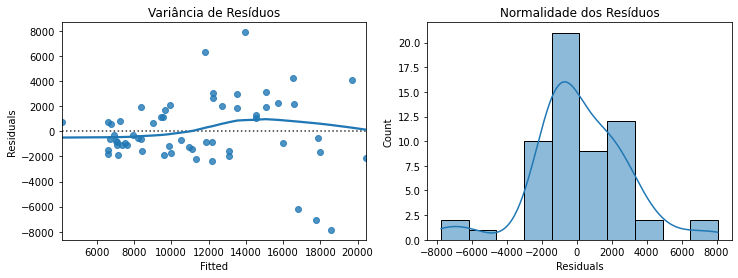

In [821]:
fig, ax =plt.subplots(1, 2, figsize=(12,4))


sns.residplot(x=y_hat_test_fs, y=residual_test, lowess=True, ax=ax[0])
sns.histplot(residual_test, kde=True, ax=ax[1])

ax[0].set_title('Variância de Resíduos')
ax[1].set_title('Normalidade dos Resíduos')


ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')
ax[1].set_xlabel('Residuals')

**Variância de Resíduos**


Os resíduos em um modelo estatístico ou de aprendizado de máquina são as diferenças entre os valores de dados observados e previstos. Eles são uma medida de diagnóstico usada ao avaliar a qualidade de um modelo. Eles também são conhecidos como erros.

Olhando para nosso gráfico acima sobre Variancia de Resíduos, concluimos que temos um caso de heterocedasticidade

A suposição de heterocedasticidade significa que a variância dos resíduos deve ser constante para que a regressão seja confiável. Você pode detectá-lo plotando os resíduos em relação aos valores ajustados. A variância dos resíduos não deve aumentar ou diminuir à medida que os valores ajustados aumentam.

Agora, a heteroscedasticidade não significa que nosso modelo deva ser descartado, apenas que há mais trabalho que pode ser feito para melhorá-lo.


**Normalidade dos Residuos**

Utilizando a estatística **Jarque-Bera.**

Essa estatística testa a hipótese nula de que os resíduos são normalmente distribuídos. Isso significa que, se o p-value estiver abaixo do limite de 0,05, você poderá rejeitar a hipótese nula e seus resíduos não serão normalmente distribuídos.

In [824]:
# Verifica a normalidade dos residuos
print(f'Jarque-Bera p-value: {sms.jarque_bera(residual_test)[1]:.5f}')

Jarque-Bera p-value: 0.00951
